# Overview

# Prepare

## Import Libraries

In [64]:
import pandas as pd
import numpy as np
import datetime

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

%matplotlib inline

## Import Data

In [12]:
test_scores_df = pd.read_csv(r'C:/Users/Brandi/Documents/Data Projects/test-score-analysis/test_scores.csv')

In [13]:
test_scores_df.shape
test_scores_df.info()

(2133, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


In [14]:
test_scores_df.isnull().sum()

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
student_id         0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

In [15]:
test_scores_df.duplicated().sum()

0

In [16]:
test_scores_df.describe()
test_scores_df.head()

,n_student,pretest,posttest
count,2133.000000,2133.000000,2133.000000
mean,22.796531,54.955931,67.102203
std,4.228893,13.563101,13.986789
min,14.000000,22.000000,32.000000
25%,20.000000,44.000000,56.000000
50%,22.000000,56.000000,68.000000
75%,27.000000,65.000000,77.000000
max,31.000000,93.000000,100.000000


,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


# Process / Clean

In [17]:
#create copy of original df
test_scores_df_v2 = test_scores_df

In [18]:
#add new column
test_scores_df_v2["improved"] = test_scores_df_v2["pretest"] < test_scores_df_v2["posttest"]

In [19]:
#add new column
test_scores_df_v2["improved_value"] = test_scores_df_v2["posttest"] - test_scores_df_v2["pretest"]

# Analyze

([<matplotlib.patches.Wedge at 0x2117d35de80>,
 [Text(-0.006480469580505546, -1.099980910522549, 'Yes'),
  Text(0.006480429350956879, 1.0999809107595584, 'No')],
 [Text(-0.003534801589366661, -0.599989587557754, '99.8%'),
  Text(0.003534779645976479, 0.5999895876870317, '0.2%')])

(-1.1004568034521516,
 1.101194268563681,
 -1.1007925705430555,
 1.1000377416049127)

Text(0.5, 1.0, 'Improvement from Pre to Post')

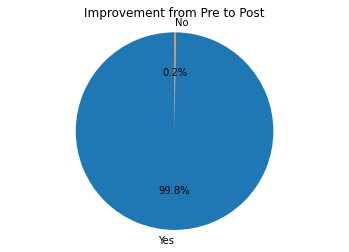

In [55]:
improved = ["Yes", "No"]
count = test_scores_df_v2["improved"].value_counts()

fig1, ax1 = plt.subplots()
fig1.patch.set_facecolor('white')
ax1.pie(count, labels=improved, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Improvement from Pre to Post")

plt.show()

In [20]:
# gather all categorical data
object_columns = [col 
for col in test_scores_df_v2.columns 
    if test_scores_df_v2[col].dtype == 'object']

object_columns

['school',
 'school_setting',
 'school_type',
 'classroom',
 'teaching_method',
 'student_id',
 'gender',
 'lunch']

In [21]:
for i in object_columns:
    print(i)
    print(test_scores_df_v2[i].unique())
    print('*'*60)

school
['ANKYI' 'CCAAW' 'CIMBB' 'CUQAM' 'DNQDD' 'FBUMG' 'GJJHK' 'GOKXL' 'GOOBU'
 'IDGFP' 'KFZMY' 'KZKKE' 'LAYPA' 'OJOBU' 'QOQTS' 'UAGPU' 'UKPGS' 'UUUQX'
 'VHDHF' 'VKWQH' 'VVTVA' 'ZMNYA' 'ZOWMK']
************************************************************
school_setting
['Urban' 'Suburban' 'Rural']
************************************************************
school_type
['Non-public' 'Public']
************************************************************
classroom
['6OL' 'ZNS' '2B1' 'EPS' 'IQN' 'PGK' 'UHU' 'UWK' 'A33' 'EID' 'HUJ' 'PC6'
 '1Q1' 'BFY' 'OMI' 'X6Z' '2AP' 'PW5' 'ROP' 'ST7' 'XXJ' '197' '5LQ' 'JGD'
 'HCB' 'NOR' 'X78' 'YUC' 'ZDT' 'ENO' 'TSA' 'VA6' '18K' 'CXC' 'HKF' 'PBA'
 'U6J' 'W8A' '05H' '98D' 'G2L' 'P2A' 'XZM' '1VD' '21Q' '2BR' '3D0' '5JK'
 'O6A' 'QTU' 'AJ1' 'J8J' 'RA5' '5SZ' '6U9' 'FS3' 'XJ8' '0N7' '3XJ' 'RK7'
 'SUR' 'X2O' 'XZ4' '1SZ' '62L' 'NWZ' 'S98' '08N' '9AW' 'IPU' 'KXB' 'PGH'
 'XXE' '6C1' 'AE1' 'H7S' 'P8I' 'SSP' 'CD8' 'J6X' 'KR1' '341' 'D33' 'DFQ'
 'GYM' 'IEM' '7BL' 'A

<AxesSubplot:xlabel='school_setting', ylabel='count'>

<AxesSubplot:xlabel='school_type', ylabel='count'>

<AxesSubplot:xlabel='teaching_method', ylabel='count'>

<AxesSubplot:xlabel='gender', ylabel='count'>

<AxesSubplot:xlabel='lunch', ylabel='count'>

IndexError: list index out of range

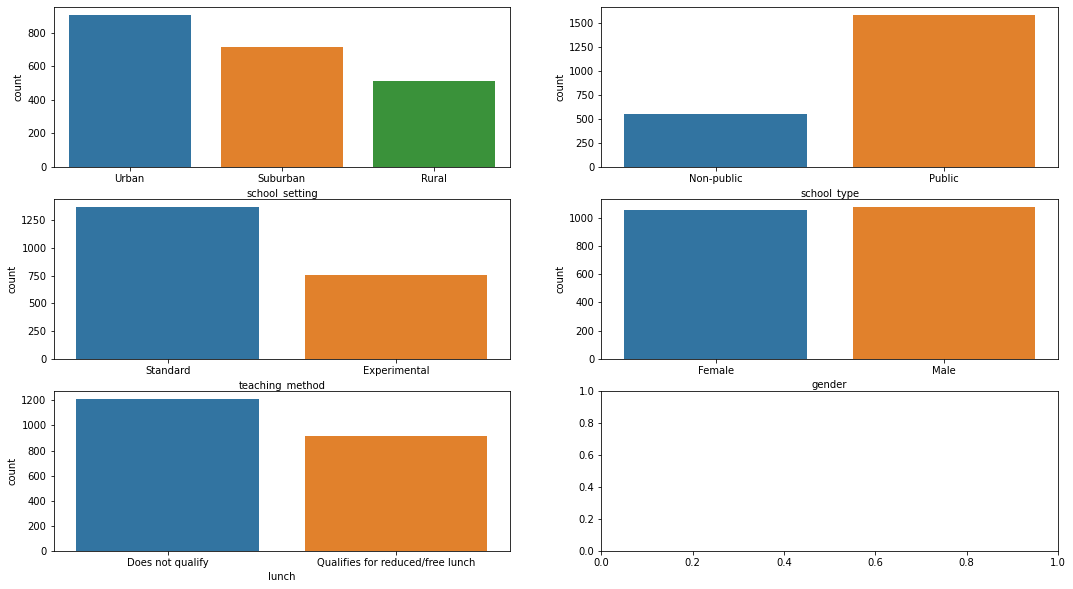

In [63]:
# record count distribution of categorical data 

c = 0
list1 = [
#test_scores_df_v2.school,
test_scores_df_v2.school_setting,
test_scores_df_v2.school_type,
#test_scores_df_v2.classroom,
test_scores_df_v2.teaching_method,
#test_scores_df_v2.student_id,
test_scores_df_v2.gender,
test_scores_df_v2.lunch]

fig, axes = plt.subplots(3, 2, figsize=(18, 10))
for i in range(3):
    for j in range(2):
        sns.countplot(ax=axes[i,j],x = list1[c])
        c+=1

### Observation

Of the total students, most students have the following characteristics:
* Urban location
* Public school
* Standard teaching method
* Does not qualify for reduced/free lunch


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


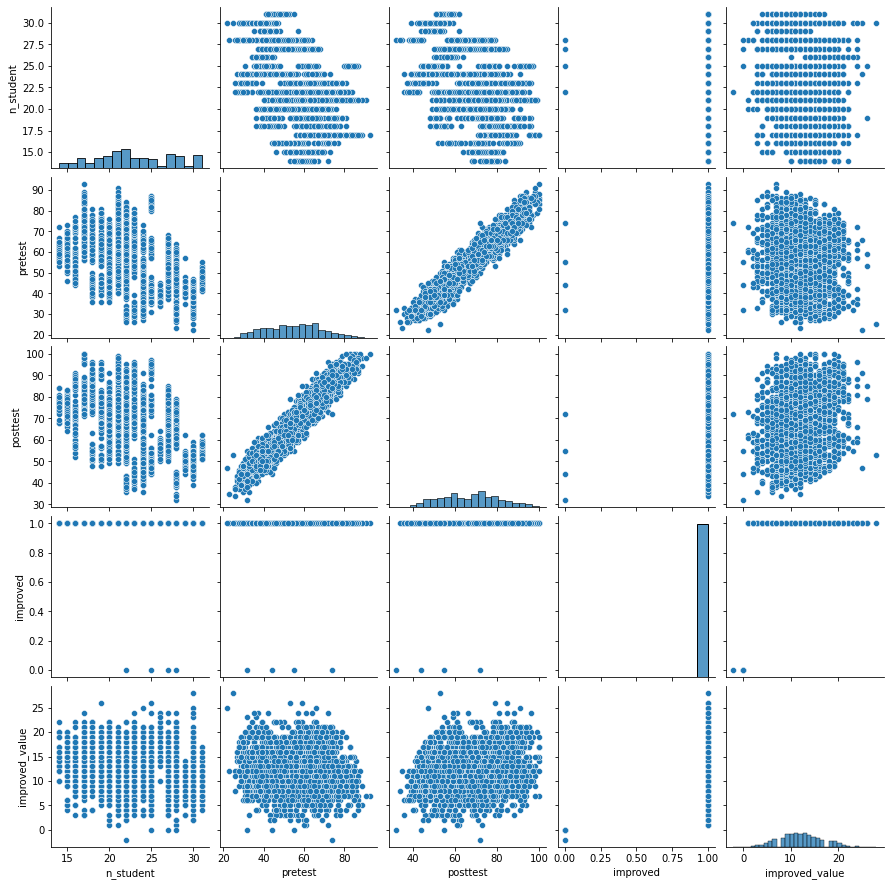

In [23]:
#pair plot for quick coorelation analysis of numerical variables
sns.pairplot(test_scores_df)

### Observation 
Pre and Post test scores are the only obvious correlation

## Outliers

<AxesSubplot:xlabel='n_student'>

<AxesSubplot:xlabel='pretest'>

<AxesSubplot:xlabel='posttest'>

<AxesSubplot:xlabel='improved_value'>

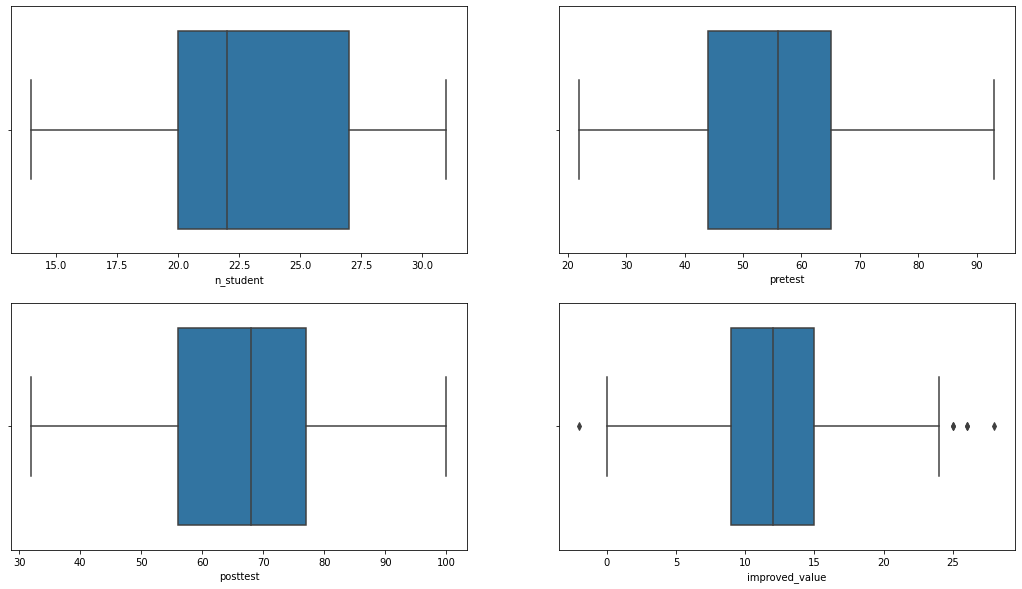

In [24]:
c = 0
list1 = [
test_scores_df_v2.n_student,
test_scores_df_v2.pretest,
test_scores_df_v2.posttest,
test_scores_df_v2.improved_value]

fig, axes = plt.subplots(2, 2, figsize=(18, 10))
for i in range(2):
    for j in range(2):
        sns.boxplot(ax=axes[i,j],x = list1[c])
        c+=1

In [25]:
outlier_df = pd.DataFrame(test_scores_df_v2)

In [26]:
outlier_df = test_scores_df_v2[(test_scores_df_v2['improved_value'] > 24) | (test_scores_df_v2['improved_value'] < 0)]

In [27]:
outlier_df

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest,improved,improved_value
1342,QOQTS,Urban,Public,X2O,Experimental,25.0,EJAMZ,Male,Does not qualify,59.0,85.0,True,26.0
1784,VKWQH,Rural,Public,DFQ,Experimental,19.0,KM4CH,Male,Does not qualify,53.0,79.0,True,26.0
1873,VVTVA,Urban,Public,A93,Experimental,30.0,A84RV,Female,Qualifies for reduced/free lunch,22.0,47.0,True,25.0
1958,ZMNYA,Suburban,Public,1UU,Experimental,24.0,M9WKI,Female,Does not qualify,66.0,91.0,True,25.0
1976,ZMNYA,Suburban,Public,4NN,Standard,22.0,4KPNR,Female,Does not qualify,74.0,72.0,False,-2.0
2044,ZOWMK,Urban,Public,Q0E,Experimental,30.0,0WLKR,Male,Qualifies for reduced/free lunch,25.0,53.0,True,28.0


### Observation
* Few outliers are seen on the boxplot for improved values
* We will not remove these records as they do not appear to be mistakes

## Correlation

(<Figure size 720x432 with 1 Axes>, <AxesSubplot:>)

<AxesSubplot:>

Text(0.5, 1.0, 'Correlation Matrix for Test Scores')

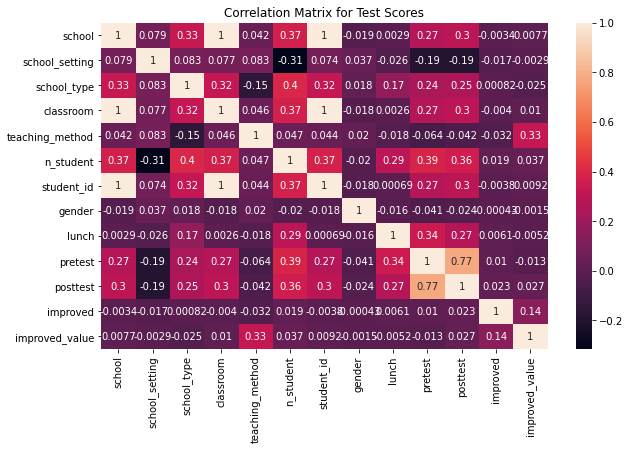

In [28]:
#matrix for all variables. factorized categorical variables. 
correlation_matrix = test_scores_df_v2.apply(lambda x: x.factorize()[0]).corr(method='pearson')

plt.subplots(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation Matrix for Test Scores")
plt.show()


In [29]:
corr_pairs = correlation_matrix.unstack().sort_values(kind="quicksort")
strong_pairs = corr_pairs[(abs(corr_pairs) > 0.5) & (abs(corr_pairs) != 1)]
strong_pairs.drop_duplicates()

posttest    pretest       0.773526
student_id  school        0.998397
classroom   school        0.998514
            student_id    0.999669
dtype: float64

### Observation
Only pre and post scores are obviously correlated. Appears this is due to most students improving from pretest to posttest.  
All other strong pairs are not indicative of insightful patterns.

<AxesSubplot:>

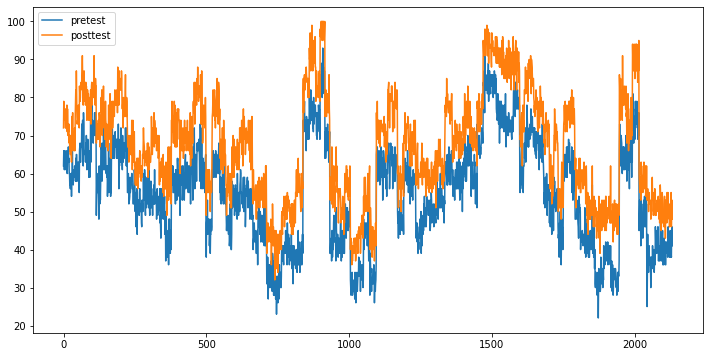

In [30]:
#pre and post scores are closely correlated. 
test_scores_df_v2[["pretest","posttest"]].plot(figsize=(12, 6))

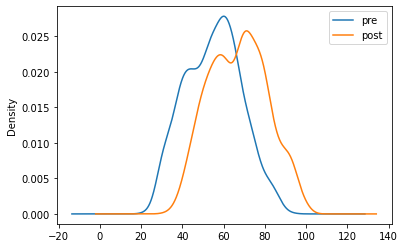

In [31]:
df = pd.DataFrame({
    'pre': test_scores_df_v2["pretest"],
    'post': test_scores_df_v2["posttest"],
})
ax = df.plot.kde()

In [32]:
# looking at correlations with posttest
corr_pairs['posttest'].sort_values(ascending=False)

posttest           1.000000
pretest            0.773526
n_student          0.355177
student_id         0.299949
school             0.298593
classroom          0.295595
lunch              0.266394
school_type        0.248316
improved_value     0.027190
improved           0.023270
gender            -0.024449
teaching_method   -0.042330
school_setting    -0.186190
dtype: float64

<AxesSubplot:>

Text(0.5, 1.0, 'Correlation Matrix for Test Scores')

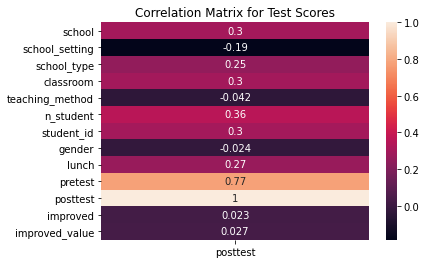

In [33]:
# select dependent variable
dependent_var = correlation_matrix[['posttest']]
sns.heatmap(dependent_var, annot = True)
plt.title("Correlation Matrix for Test Scores")
plt.show()

### Observation 
n_student has highest postive correlation with posttest, other than pretest. 

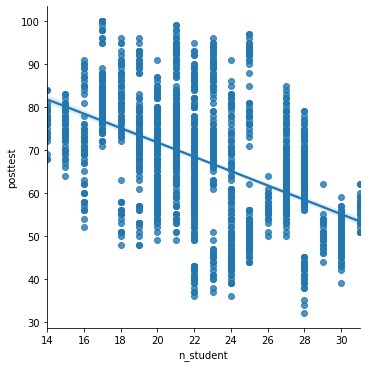

In [34]:
sns.lmplot(x="n_student", y="posttest", data=test_scores_df_v2)

In [35]:
# looking at correlations with improved_value
corr_pairs['improved_value'].sort_values(ascending=False)

improved_value     1.000000
teaching_method    0.326535
improved           0.138074
n_student          0.036654
posttest           0.027190
classroom          0.010158
student_id         0.009200
school             0.007651
gender            -0.001540
school_setting    -0.002935
lunch             -0.005175
pretest           -0.012928
school_type       -0.025433
dtype: float64

<AxesSubplot:>

Text(0.5, 1.0, 'Correlation Matrix for Improvement')

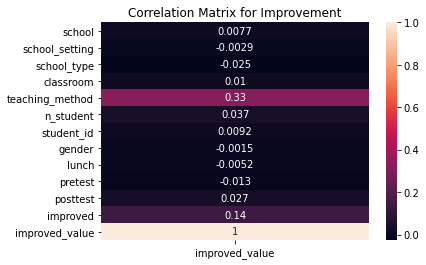

In [36]:
# select dependent variable
dependent_var = correlation_matrix[['improved_value']]

sns.heatmap(dependent_var, annot = True)
plt.title("Correlation Matrix for Improvement")
plt.show()

### Observation
teaching_method has highest correlation with improved value

In [38]:
setting_improvement = test_scores_df_v2.groupby(["school_setting"])["improved_value"].mean()
type_improvement = test_scores_df_v2.groupby(["school_type"])["improved_value"].mean()
method_improvement = test_scores_df_v2.groupby(["teaching_method"])["improved_value"].mean()

In [39]:
setting_improvement_df = pd.DataFrame(setting_improvement)
type_improvement_df = pd.DataFrame(type_improvement)
method_improvement_df = pd.DataFrame(method_improvement)

In [41]:
setting_improvement_df["category"] = "school_setting"
type_improvement_df["category"] = "school_type"
method_improvement_df["category"] = "teaching_method"

In [42]:
improvement_df = setting_improvement_df.append(type_improvement_df).append(method_improvement_df)

In [43]:
improvement_df = improvement_df.sort_values('improved_value', ascending=False)

<Figure size 720x360 with 0 Axes>

<AxesSubplot:ylabel='improved_value'>

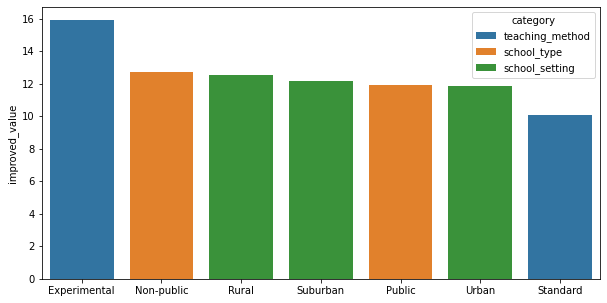

In [45]:
plt.figure(figsize=(10, 5))
sns.barplot(x = improvement_df.index, y = "improved_value", data = improvement_df, hue = 'category', dodge=False)
plt.show()

<AxesSubplot:xlabel='teaching_method', ylabel='improved_value'>

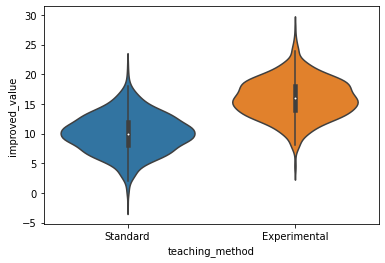

In [53]:
fig1.patch.set_facecolor('white')
sns.violinplot(x="teaching_method", y="improved_value", data=test_scores_df_v2)

### Observation
Experimental teaching method show the highest score improvement

In [46]:
#top 10 posttest score
top_10_posttest = test_scores_df_v2.sort_values('posttest', ascending=False).head(10)

<AxesSubplot:xlabel='school', ylabel='count'>

<AxesSubplot:xlabel='school_setting', ylabel='count'>

<AxesSubplot:xlabel='school_type', ylabel='count'>

<AxesSubplot:xlabel='classroom', ylabel='count'>

<AxesSubplot:xlabel='teaching_method', ylabel='count'>

<AxesSubplot:xlabel='gender', ylabel='count'>

<AxesSubplot:xlabel='lunch', ylabel='count'>

IndexError: list index out of range

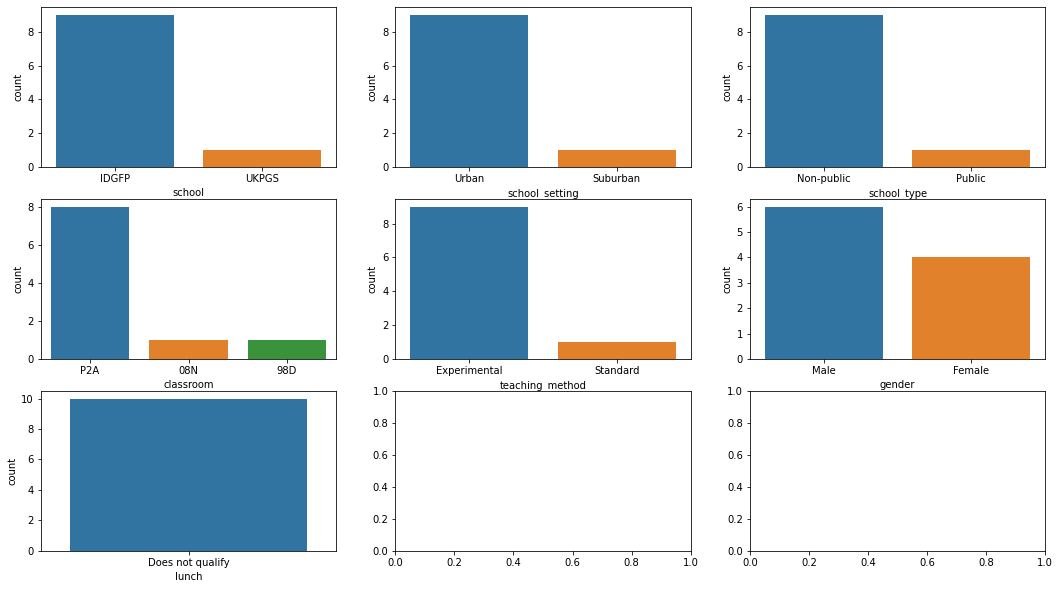

In [61]:
c = 0
list1 = [
top_10_posttest.school,
top_10_posttest.school_setting,
top_10_posttest.school_type,
top_10_posttest.classroom,
top_10_posttest.teaching_method,
#top_10_posttest.student_id,
top_10_posttest.gender,
top_10_posttest.lunch]

fig, axes = plt.subplots(3, 3, figsize=(18, 10))
for i in range(3):
    for j in range(3):
        sns.countplot(ax=axes[i,j],x = list1[c])
        c+=1

### Top 10 students with highest test score trends
* School IDGFP 
* Urban
* Non-public
* Classroom P2A
* Experimental

In [48]:
#top 10 most improved 
top_10_improved = test_scores_df_v2.sort_values('improved_value', ascending=False).head(10)

<AxesSubplot:xlabel='school', ylabel='count'>

<AxesSubplot:xlabel='school_setting', ylabel='count'>

<AxesSubplot:xlabel='school_type', ylabel='count'>

<AxesSubplot:xlabel='classroom', ylabel='count'>

<AxesSubplot:xlabel='teaching_method', ylabel='count'>

<AxesSubplot:xlabel='gender', ylabel='count'>

<AxesSubplot:xlabel='lunch', ylabel='count'>

IndexError: list index out of range

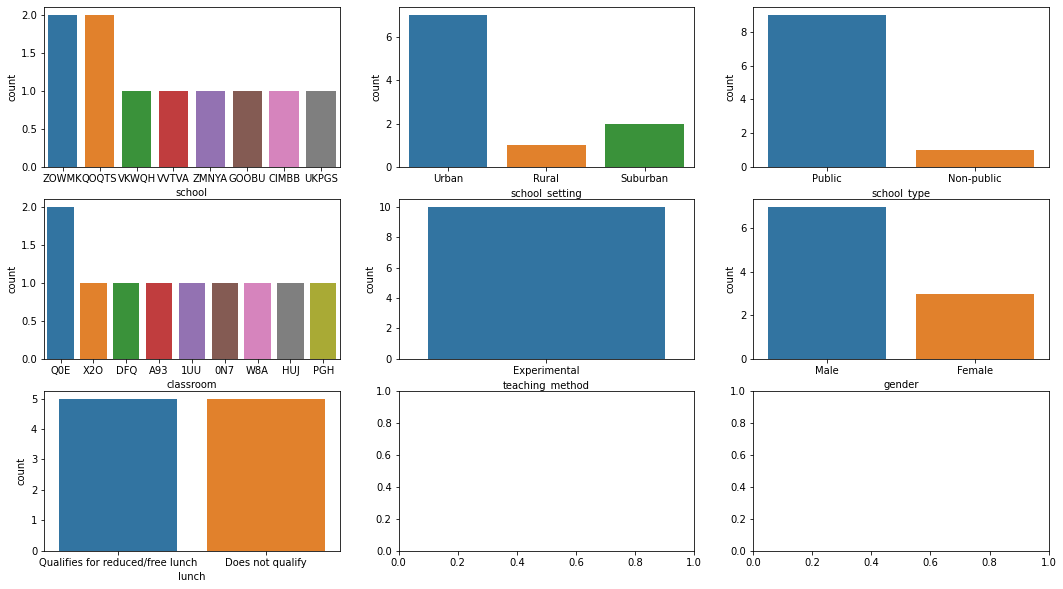

In [49]:
# record count distribution of categorical data 

c = 0
list1 = [
top_10_improved.school,
top_10_improved.school_setting,
top_10_improved.school_type,
top_10_improved.classroom,
top_10_improved.teaching_method,
#top_10_improved.student_id,
top_10_improved.gender,
top_10_improved.lunch]

fig, axes = plt.subplots(3, 3, figsize=(18, 10))
for i in range(3):
    for j in range(3):
        sns.countplot(ax=axes[i,j],x = list1[c])
        c+=1

### Observation  
Top 10 improved students trends
* Urban
* Public
* Experimental
* Male

# Export Data

In [58]:
improvement_df.to_csv('improvement.csv')

# Observations
## Student Characteristics

Of the 2133 total students, 99.8% of students showed improvement from pre to post test. Only 4 students did not improve. 

The following distinct characteristics are seen most often in the population of 2133 students:
* Urban location
* Public school
* Standard teaching method
* Does not qualify for reduced/free lunch

Top 10 students with highest test score trends:
* School IDGFP 
* Urban
* Non-public
* Classroom P2A
* Experimental

Top 10 improved students trends:
* Urban
* Public
* Experimental
* Male


## Correlation

* Pre and post scores were strongly correlated. 
    * This is due to the vast majority of students improving from pretest to posttest. This would cause most points in the graph to shift together and in the same direction from pre to post test. 
* The number of students in a classroom (n_student) has highest postive correlation with posttest, other than pretest.
    * As the number of students in a classroom increase, the posttest scores drop. 
* The type of teaching method (teaching_method) has highest correlation with improved score value (improved_value).
    * Experimental was the most effective teaching method as it showed the highest score improvement.

# Conclusion

* Smaller class sizes lead to higher scores
* Experimental teaching methods lead to higher improvement